 #  <font color='#7E9BC0'> Movies Recommendation | movielens.org. </font>

<b> </h4> **Data Cleaning Movies Recommendation | movielens.org** </b> 
</div>

<b> **Autors:**</b> 
Juan Pablo López Salazar, Bryan Urra Calfuñir.  
</div>

<b> **Data Source:**</b> 
F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets: History and Context. ACM Transactions on Interactive Intelligent Systems (TiiS) 5, 4: 19:1–19:19. <https://doi.org/10.1145/2827872>
</div>

# **Libreries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
import numpy as np
import re
%matplotlib inline


# **Importing Data**


In [2]:
movies = pd.read_csv("movies.csv",index_col=0)
ratings = pd.read_csv("ratings.csv")
ratings=ratings.rename(columns={'timestamp':'TimeRating'})

In [3]:
movies.columns

Index(['title', 'genres'], dtype='object')

In [4]:
movies

title  \
movieId                                            
1                               Toy Story (1995)   
2                                 Jumanji (1995)   
3                        Grumpier Old Men (1995)   
4                       Waiting to Exhale (1995)   
5             Father of the Bride Part II (1995)   
...                                          ...   
193876                   The Great Glinka (1946)   
193878   Les tribulations d'une caissière (2011)   
193880                  Her Name Was Mumu (2016)   
193882                              Flora (2017)   
193886                               Leal (2018)   

                                              genres  
movieId                                               
1        Adventure|Animation|Children|Comedy|Fantasy  
2                         Adventure|Children|Fantasy  
3                                     Comedy|Romance  
4                               Comedy|Drama|Romance  
5                                             Comedy  
...                                              ...  
193876                            (no genres listed)  
193878                                        Comedy  
193880                                         Drama  
193882                 Adventure|Drama|Horror|Sci-Fi  
193886                            Action|Crime|Drama  

[58098 rows x 2 columns]

In [5]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'TimeRating'], dtype='object')

In [6]:
ratings

userId  movieId  rating  TimeRating
0              1      307     3.5  1256677221
1              1      481     3.5  1256677456
2              1     1091     1.5  1256677471
3              1     1257     4.5  1256677460
4              1     1449     4.5  1256677264
...          ...      ...     ...         ...
27753439  283228     8542     4.5  1379882795
27753440  283228     8712     4.5  1379882751
27753441  283228    34405     4.5  1379882889
27753442  283228    44761     4.5  1354159524
27753443  283228    54286     4.5  1354159718

[27753444 rows x 4 columns]

For furter information abou the data sourche please check [Movielens.org](http://files.grouplens.org/datasets/movielens/ml-latest-README.html) or the file README_Dataset.txt that is inside the folder.

## **Dataframes**
* **Movies:** Provides the movie's name, gender and publication year.
* **ratings:** Provides the ratings gave for diferent users to a respective movie.

There are 57,771 movies

### **Movies dataset Analysis**

In [7]:
def Año(txt): #Function that separate the year from the movie's name 
    x=re.findall(r"[(]\d+[)]", txt)
    if len(x)>=1:
        return int (x[-1][1:5]) #this is the year
    else:
        return None #There are a few movies which don't have its year
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
movies['year'] =movies['title'].apply(Año)
movies=movies[movies['year']>0]
movies['year'] = movies['year'].astype(int) 
movies=movies[movies['year']>0]
genres_list=[]
for a in movies['genres']:
  genres_list=genres_list+a
genres=list(set(genres_list))
for b in genres:
  movies[b]=0
  for a in movies.index:
    if b in movies['genres'][a]:
      movies[b][a]=1
movies.drop('genres',axis=1,inplace=True)
movies.head()

<ipython-input-7-3094dab816e0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['year'] = movies['year'].astype(int)
<ipython-input-7-3094dab816e0>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies[b][a]=1


title  year  Musical  \
movieId                                                      
1                          Toy Story (1995)  1995        0   
2                            Jumanji (1995)  1995        0   
3                   Grumpier Old Men (1995)  1995        0   
4                  Waiting to Exhale (1995)  1995        0   
5        Father of the Bride Part II (1995)  1995        0   

         (no genres listed)  Horror  War  Mystery  Western  Film-Noir  \
movieId                                                                 
1                         0       0    0        0        0          0   
2                         0       0    0        0        0          0   
3                         0       0    0        0        0          0   
4                         0       0    0        0        0          0   
5                         0       0    0        0        0          0   

         Animation  ...  Thriller  Action  Fantasy  Children  Romance  \
movieId             ...                                                 
1                1  ...         0       0        1         1        0   
2                0  ...         0       0        1         1        0   
3                0  ...         0       0        0         0        1   
4                0  ...         0       0        0         0        1   
5                0  ...         0       0        0         0        0   

         Adventure  Sci-Fi  Crime  Documentary  IMAX  
movieId                                               
1                1       0      0            0     0  
2                1       0      0            0     0  
3                0       0      0            0     0  
4                0       0      0            0     0  
5                0       0      0            0     0  

[5 rows x 22 columns]

With this code the year column was created, as weel the categorical vairables of genres.

### **Número de Películas por año**

Text(0, 0.5, 'Movies Count')

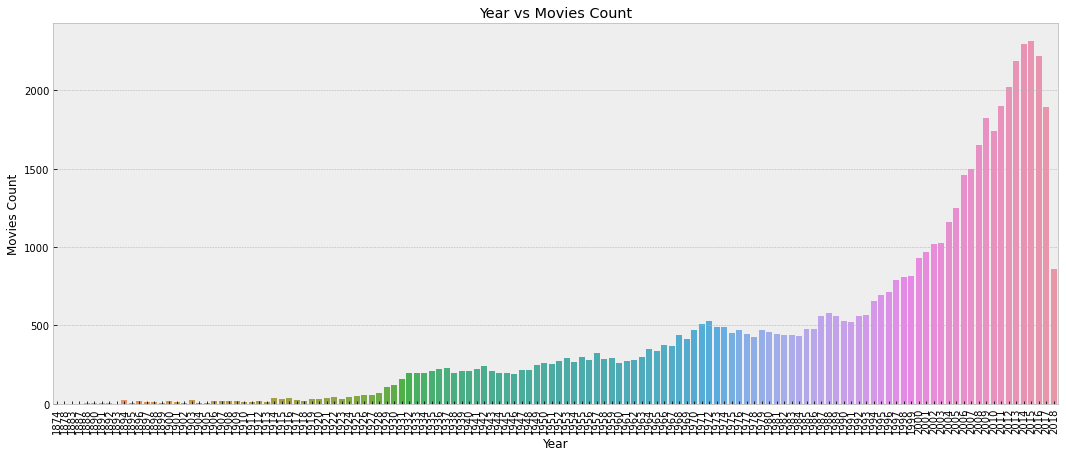

In [8]:
plt.figure(figsize=(18,7))
moviesYear=movies.groupby('year')['title'].count()
plt.title("Year vs Movies Count")
fig=sns.barplot(x=moviesYear.index, y=moviesYear.values)

fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
0
plt.xlabel("Year")
plt.ylabel("Movies Count")


There are are a big dispersion about the number of movies published for year, so we will only consider the movies published after 1970.
When a movie is old is more probable that only a person who wants to see it becuase he likes it will rate that movie, so its not very representative.

If you're using a normal computer use more recent movies (at least 1990), so you will not have problems running models.

In [9]:
movies=movies[movies['year']>1970]
movies

title  year  Musical  \
movieId                                                           
1                               Toy Story (1995)  1995        0   
2                                 Jumanji (1995)  1995        0   
3                        Grumpier Old Men (1995)  1995        0   
4                       Waiting to Exhale (1995)  1995        0   
5             Father of the Bride Part II (1995)  1995        0   
...                                          ...   ...      ...   
193872                    Room Laundering (2018)  2018        0   
193878   Les tribulations d'une caissière (2011)  2011        0   
193880                  Her Name Was Mumu (2016)  2016        0   
193882                              Flora (2017)  2017        0   
193886                               Leal (2018)  2018        0   

         (no genres listed)  Horror  War  Mystery  Western  Film-Noir  \
movieId                                                                 
1                         0       0    0        0        0          0   
2                         0       0    0        0        0          0   
3                         0       0    0        0        0          0   
4                         0       0    0        0        0          0   
5                         0       0    0        0        0          0   
...                     ...     ...  ...      ...      ...        ...   
193872                    0       0    0        0        0          0   
193878                    0       0    0        0        0          0   
193880                    0       0    0        0        0          0   
193882                    0       1    0        0        0          0   
193886                    0       0    0        0        0          0   

         Animation  ...  Thriller  Action  Fantasy  Children  Romance  \
movieId             ...                                                 
1                1  ...         0       0        1         1        0   
2                0  ...         0       0        1         1        0   
3                0  ...         0       0        0         0        1   
4                0  ...         0       0        0         0        1   
5                0  ...         0       0        0         0        0   
...            ...  ...       ...     ...      ...       ...      ...   
193872           0  ...         0       0        0         0        0   
193878           0  ...         0       0        0         0        0   
193880           0  ...         0       0        0         0        0   
193882           0  ...         0       0        0         0        0   
193886           0  ...         0       1        0         0        0   

         Adventure  Sci-Fi  Crime  Documentary  IMAX  
movieId                                               
1                1       0      0            0     0  
2                1       0      0            0     0  
3                0       0      0            0     0  
4                0       0      0            0     0  
5                0       0      0            0     0  
...            ...     ...    ...          ...   ...  
193872           0       0      0            0     0  
193878           0       0      0            0     0  
193880           0       0      0            0     0  
193882           1       1      0            0     0  
193886           0       0      1            0     0  

[46007 rows x 22 columns]

# Ratings Dataset Analysis

In [10]:
ratings.drop('TimeRating',axis=1,inplace=True)
ratings=ratings[ratings['movieId'].isin(movies.index)]
rat_orig=ratings
ratings

userId  movieId  rating
0              1      307     3.5
1              1      481     3.5
2              1     1091     1.5
3              1     1257     4.5
4              1     1449     4.5
...          ...      ...     ...
27753429  283228     6377     5.0
27753430  283228     6874     4.0
27753441  283228    34405     4.5
27753442  283228    44761     4.5
27753443  283228    54286     4.5

[25691243 rows x 3 columns]

When we discarded the old movies we reduce the number of rows from 27.8 millions to 25.7 millions 

## Ratings for user

In [11]:
RatUser=ratings.groupby(by='userId')['rating'].agg([len,np.mean])
RatUser

len      mean
userId                 
1        16.0  3.312500
2        15.0  3.666667
3         9.0  3.555556
4       725.0  3.391034
5        72.0  4.263889
...       ...       ...
283224  231.0  3.623377
283225   20.0  3.100000
283226   11.0  1.818182
283227   16.0  3.937500
283228   70.0  4.142857

[282853 rows x 2 columns]

## Ratings Distribution

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean', ylabel='Density'>

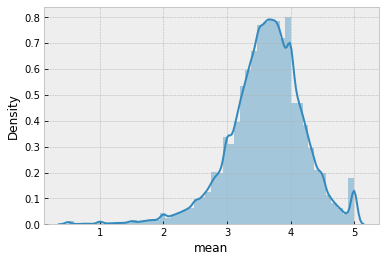

In [12]:
sns.distplot(RatUser['mean'])

In the distribution chart, we can see a distribution of the mean classification that are very similar to a normal distribution, but with the existance of people that have a very negative rates mean, and from now we'll call them "Haters". and as well people that classificate only the movies that they love and believe they are good. 

We consider that the haters not provide representative classification to this model, beacause the model try to provide movies that the people will love, but if they only classificate movies that they don't like it will not work.

In [13]:
Haters=RatUser[(RatUser['mean']<=2 )]
Haters

len      mean
userId                
33       1.0  1.000000
49       8.0  2.000000
87      16.0  1.906250
102     13.0  1.000000
130     70.0  1.578571
...      ...       ...
283134  36.0  1.777778
283141  14.0  1.750000
283180  13.0  1.923077
283218  31.0  1.354839
283226  11.0  1.818182

[4162 rows x 2 columns]

There are 4162 users wich a rating mean <= 2, and those are cataloged as haters, beacuse its rating are in general bad.

So in this code will not consider those users because of its big probability to don't like a movie.

### Rates per user

<AxesSubplot:title={'center':'Box plot Rates per user'}>

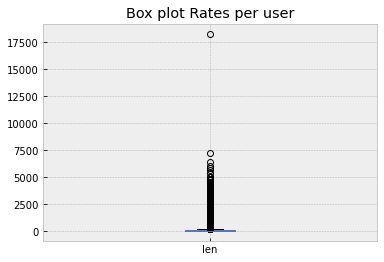

In [14]:
plt.title("Box plot Rates per user")
RatUser.boxplot('len')

In recommendation models, the users with high number of ratings help to improve the results of the model. For that reason the users with high quantify of rates will be consider even it seams as outliers

In [15]:
Q1 = RatUser['len'].quantile(0.25)
Q2 = RatUser['len'].quantile(0.5)
Q3 = RatUser['len'].quantile(0.75)
print(Q1,Q2,Q3)
RatUser=RatUser[(RatUser['len']>Q1)]
RatUser.sort_values(by='len')


14.0 29.0 88.0


len      mean
userId                   
154220     15.0  3.233333
31017      15.0  3.833333
213112     15.0  2.466667
102656     15.0  3.466667
213102     15.0  3.966667
...         ...       ...
134596   5869.0  3.139121
117490   6094.0  3.271579
111908   6442.0  1.507218
212343   7255.0  2.541213
123100  18284.0  3.100361

[203919 rows x 2 columns]

The rates from people with low quantify of rates isn't very useful for the model, for that reason will be removed all the users with less than 14 rates (Q1).

### Haters Analysis

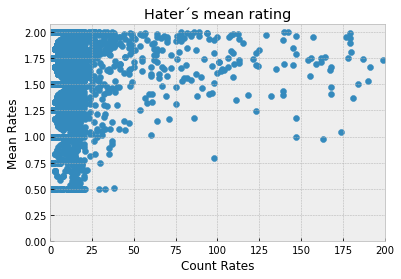

In [16]:
plt.scatter(x='len', y="mean", data=Haters)
plt.ylim(0,) # solo para hacer que el eje y parta del 0
plt.title("Hater´s mean rating")
plt.xlim([0,200])
plt.xlabel("Count Rates")
plt.ylabel("Mean Rates")
plt.show()

### Cleaning of Haters and people with few rates

In [17]:
ratings=ratings[(ratings['userId'].isin(Haters.index)==False) & (ratings['userId'].isin(RatUser.index))]
ratings

userId  movieId  rating
0              1      307     3.5
1              1      481     3.5
2              1     1091     1.5
3              1     1257     4.5
4              1     1449     4.5
...          ...      ...     ...
27753429  283228     6377     5.0
27753430  283228     6874     4.0
27753441  283228    34405     4.5
27753442  283228    44761     4.5
27753443  283228    54286     4.5

[24897855 rows x 3 columns]

## Ratings per Movie

In [18]:
RatMovies=ratings.groupby(by='movieId').agg([len,np.mean])['rating'].sort_values(by='mean', ascending=False)
RatMovies['Película']=movies['title'][RatMovies.index]
RatMovies['Año']=movies['year'][RatMovies.index]
RatMovies.head(10)

len  mean                                           Película   Año
movieId                                                                    
183023   1.0   5.0  9/11: Explosive Evidence: Experts Speak Out (2...  2012
187951   1.0   5.0                            Father of Lights (2012)  2012
158111   1.0   5.0                                     Revenge (1978)  1978
158109   1.0   5.0                    A Police Inspector Calls (1974)  1974
157931   1.0   5.0                                     La Cage (1975)  1975
131777   1.0   5.0                           Malibu Hot Summer (1981)  1981
187609   1.0   5.0                         Amore a prima vista (1999)  1999
187605   1.0   5.0                                 Kryptonite! (2011)  2011
132124   1.0   5.0                                 Say Nothing (2001)  2001
157665   1.0   5.0                            Flamenco at 5:15 (1983)  1983

### Count of rates per movie

In [19]:
Q1 = RatMovies['len'].quantile(0.25)
Q2 = RatMovies['len'].quantile(0.5)
Q3 = RatMovies['len'].quantile(0.75)
print(Q1,Q2,Q3)
RatMovies=RatMovies[(RatMovies['len']>30)]
RatMovies.sort_values(by='len')

2.0 7.0 57.0


len      mean                                          Película  \
movieId                                                                        
8635        31.0  2.709677  Jungle Holocaust (Ultimo mondo cannibale) (1977)   
96347       31.0  3.983871                                  Endeavour (2012)   
26574       31.0  3.435484            Ginger and Fred (Ginger e Fred) (1986)   
162660      31.0  2.983871                           God's Not Dead 2 (2016)   
170937      31.0  2.983871                                 Win It All (2017)   
...          ...       ...                                               ...   
2571     78819.0  4.156314                                Matrix, The (1999)   
593      82203.0  4.157853                  Silence of the Lambs, The (1991)   
296      88322.0  4.183233                               Pulp Fiction (1994)   
356      90200.0  4.053476                               Forrest Gump (1994)   
318      90517.0  4.426019                  Shawshank Redemption, The (1994)   

          Año  
movieId        
8635     1977  
96347    2012  
26574    1986  
162660   2016  
170937   2017  
...       ...  
2571     1999  
593      1991  
296      1994  
356      1994  
318      1994  

[13516 rows x 4 columns]

If a movie is few times evaluated, could be bad for the model, because the results aren't significants, so it will only consider movies with at least 30 rate to be consider stadistical significant

### Rating Distrubution per movie

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean', ylabel='Density'>

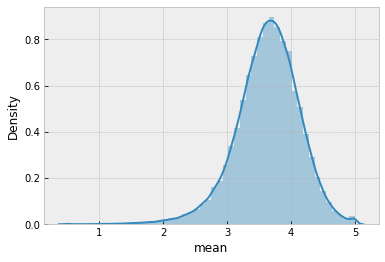

In [20]:
sns.distplot(RatUser['mean'])

In the chart can be identified a very bad rate group of movies, these movies will be consider as "Bad Movies", that aren't need in a model, which proposit is to sugest good recommendations.

### **Bad Movies**

It will be consider when the rating mean is <=3




In [21]:
BadMovies=RatMovies[(RatMovies['mean']<=3 )]
BadMovies.sort_values(by='len',ascending=False)

len      mean                                 Película   Año
movieId                                                                  
344      43230.0  2.993234        Ace Ventura: Pet Detective (1994)  1994
153      36420.0  2.892147                    Batman Forever (1995)  1995
231      36416.0  2.961500   Dumb & Dumber (Dumb and Dumber) (1994)  1994
208      30821.0  2.869050                        Waterworld (1995)  1995
1917     25735.0  2.994910                        Armageddon (1998)  1998
...          ...       ...                                      ...   ...
163911      31.0  2.774194  USS Indianapolis: Men of Courage (2016)  2016
133151      31.0  2.774194   Barbie and the Three Musketeers (2009)  2009
45200       31.0  2.983871     Coast Guard, The (Hae anseon) (2002)  2002
162660      31.0  2.983871                  God's Not Dead 2 (2016)  2016
109788      31.0  2.838710                       Bad Country (2014)  2014

[3689 rows x 4 columns]

### **Delete Bad Movies**


In [22]:
ratings=ratings[(ratings['movieId'].isin(BadMovies.index)==False) & (ratings['movieId'].isin(RatMovies.index))]
ratings

userId  movieId  rating
0              1      307     3.5
1              1      481     3.5
3              1     1257     4.5
4              1     1449     4.5
7              1     2134     4.5
...          ...      ...     ...
27753429  283228     6377     5.0
27753430  283228     6874     4.0
27753441  283228    34405     4.5
27753442  283228    44761     4.5
27753443  283228    54286     4.5

[21363028 rows x 3 columns]

<AxesSubplot:xlabel='rating'>

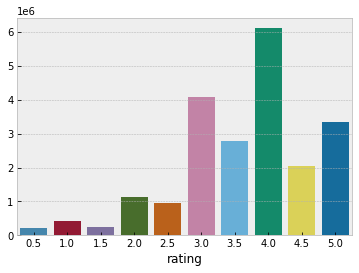

In [24]:
# Histogram 
count=ratings.groupby(['rating']).count()['userId']
count
sns.barplot(x=count.index, y=count.values)

In [23]:
df=pd.merge(movies,ratings,how='inner',on='movieId')
df

movieId                     title  year  Musical  \
0               1          Toy Story (1995)  1995        0   
1               1          Toy Story (1995)  1995        0   
2               1          Toy Story (1995)  1995        0   
3               1          Toy Story (1995)  1995        0   
4               1          Toy Story (1995)  1995        0   
...           ...                       ...   ...      ...   
21363023   192283  Crazy Rich Asians (2018)  2018        0   
21363024   192283  Crazy Rich Asians (2018)  2018        0   
21363025   192283  Crazy Rich Asians (2018)  2018        0   
21363026   192283  Crazy Rich Asians (2018)  2018        0   
21363027   192283  Crazy Rich Asians (2018)  2018        0   

          (no genres listed)  Horror  War  Mystery  Western  Film-Noir  ...  \
0                          0       0    0        0        0          0  ...   
1                          0       0    0        0        0          0  ...   
2                          0       0    0        0        0          0  ...   
3                          0       0    0        0        0          0  ...   
4                          0       0    0        0        0          0  ...   
...                      ...     ...  ...      ...      ...        ...  ...   
21363023                   0       0    0        0        0          0  ...   
21363024                   0       0    0        0        0          0  ...   
21363025                   0       0    0        0        0          0  ...   
21363026                   0       0    0        0        0          0  ...   
21363027                   0       0    0        0        0          0  ...   

          Fantasy  Children  Romance  Adventure  Sci-Fi  Crime  Documentary  \
0               1         1        0          1       0      0            0   
1               1         1        0          1       0      0            0   
2               1         1        0          1       0      0            0   
3               1         1        0          1       0      0            0   
4               1         1        0          1       0      0            0   
...           ...       ...      ...        ...     ...    ...          ...   
21363023        0         0        0          0       0      0            0   
21363024        0         0        0          0       0      0            0   
21363025        0         0        0          0       0      0            0   
21363026        0         0        0          0       0      0            0   
21363027        0         0        0          0       0      0            0   

          IMAX  userId  rating  
0            0       4     4.0  
1            0      10     5.0  
2            0      14     4.5  
3            0      15     4.0  
4            0      22     4.0  
...        ...     ...     ...  
21363023     0  261224     3.5  
21363024     0  261870     0.5  
21363025     0  266861     3.5  
21363026     0  275841     3.0  
21363027     0  277968     3.5  

[21363028 rows x 25 columns]

### **Export DataFrame**

In [25]:
df.to_csv ('df.csv')